# Data Science in Credit Risk: Compliant Economic Cycle and Downturn Identification for PDs and LGDs using Python.

See article: https://medium.com/@willempretorius/data-science-in-credit-risk-compliant-economic-cycle-and-downturn-identification-for-pds-and-lgds-c62bc7dc9ae8

## Identifying Recession periods

We are now going to analyse the recession periods for The Netherlands using quarterly GDP and Unemployment data from 2000 to 2022. 

In [1]:
import pandas as pd

df = pd.read_csv("QuarterlyMacroEconomicData.csv")
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.set_index('Date', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2000-03-31 to 2022-12-31
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GDP           92 non-null     float64
 1   Unemployment  92 non-null     float64
dtypes: float64(2)
memory usage: 2.2 KB


In [2]:
gdp_data = df['GDP']
gdp_data.tail()

Date
2021-12-31    0.798697
2022-03-31    0.517007
2022-06-30    1.841992
2022-09-30   -0.185737
2022-12-31    0.864362
Name: GDP, dtype: float64

In [3]:
gdp_data.describe()

count    92.000000
mean      0.401213
std       1.334863
min      -8.348640
25%       0.116205
50%       0.499082
75%       0.805148
max       6.376225
Name: GDP, dtype: float64

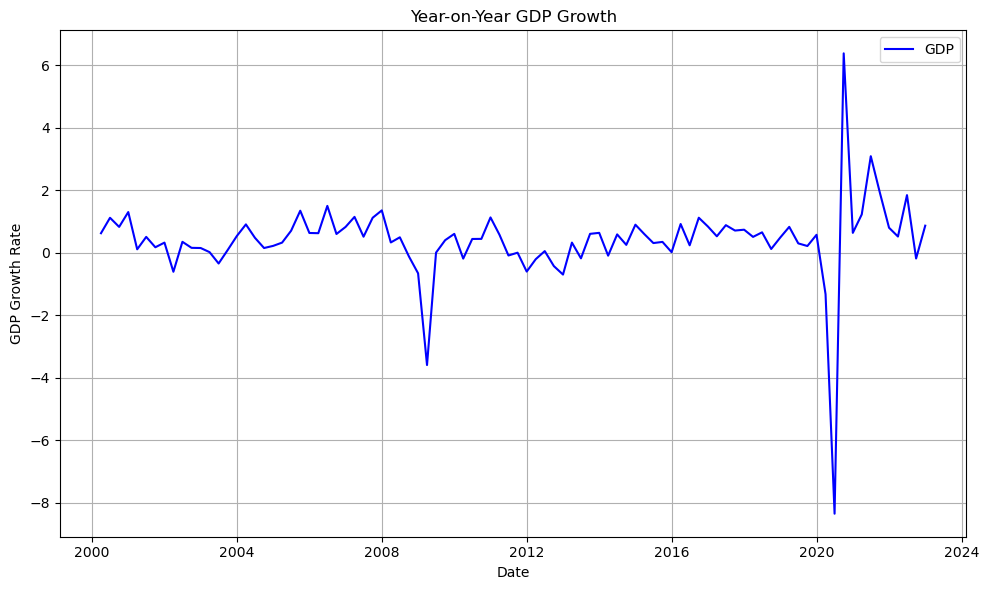

In [5]:
import matplotlib.pyplot as plt

# Plot GDP data
plt.figure(figsize=(10, 6))
plt.plot(gdp_data, color='blue', label='GDP')
plt.title('Year-on-Year GDP Growth')
plt.xlabel('Date')
plt.ylabel('GDP Growth Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
def detect_recession_quarters(data_path):
    """
    Detects recession quarters based on two or more consecutive quarters of declining GDP.

    Args:
        data_path (str): Path to the CSV file containing the GDP data.
        
    Returns:
        list: List of tuples, where each tuple represents a recession quarter as (year, quarter).
    """
    # Load your DataFrame and set Date as the index
    df = pd.read_csv(data_path)
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
    df.set_index('Date', inplace=True)

    recession_quarters = []
    consecutive_decline = 0  # Counter for consecutive declining quarters

    # Detect recession quarters
    for i in range(1, len(df)):
        if df['GDP'].iloc[i] < df['GDP'].iloc[i - 1]:
            consecutive_decline += 1
            if consecutive_decline >= 2:  # Two or more consecutive declining quarters
                date = df.index[i]
                recession_quarters.append((date))
        else:
            consecutive_decline = 0


    return recession_quarters


In [7]:
data_path = 'QuarterlyMacroEconomicData.csv'
recession_quarters = detect_recession_quarters(data_path)
print("Recession Quarters:", recession_quarters)

Recession Quarters: [Timestamp('2002-12-31 00:00:00'), Timestamp('2003-03-31 00:00:00'), Timestamp('2003-06-30 00:00:00'), Timestamp('2004-09-30 00:00:00'), Timestamp('2006-03-31 00:00:00'), Timestamp('2008-12-31 00:00:00'), Timestamp('2009-03-31 00:00:00'), Timestamp('2011-06-30 00:00:00'), Timestamp('2012-12-31 00:00:00'), Timestamp('2015-06-30 00:00:00'), Timestamp('2017-03-31 00:00:00'), Timestamp('2019-09-30 00:00:00'), Timestamp('2020-06-30 00:00:00'), Timestamp('2021-12-31 00:00:00'), Timestamp('2022-03-31 00:00:00')]


## GDP Recession Periods

| Recession Quarters |
|--------------------|
| 2002-12-31         |
| 2003-03-31         |
| 2003-06-30         |
| 2004-09-30         |
| 2006-03-31         |
| 2008-12-31         |
| 2009-03-31         |
| 2011-06-30         |
| 2012-12-31         |
| 2015-06-30         |
| 2017-03-31         |
| 2019-09-30         |
| 2020-06-30         |
| 2021-12-31         |
| 2022-03-31         |


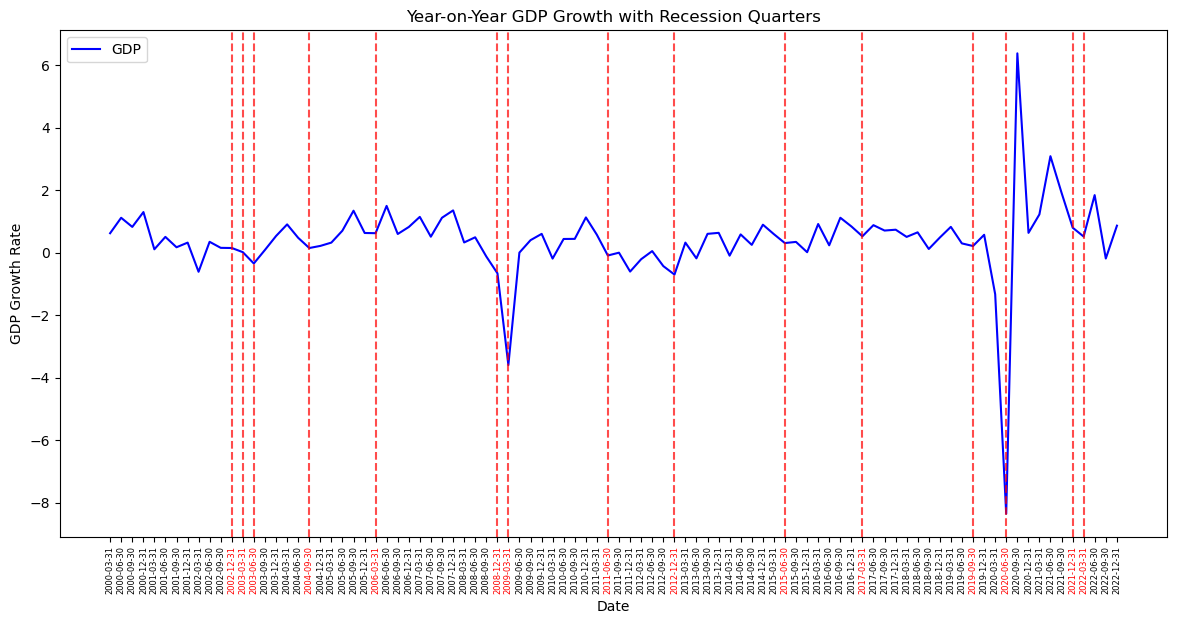

In [8]:
# Plot GDP data
plt.figure(figsize=(12, 6))
plt.plot(gdp_data, color='blue', label='GDP')
plt.title('Year-on-Year GDP Growth with Recession Quarters')
plt.xlabel('Date')
plt.ylabel('GDP Growth Rate')
plt.tight_layout()

# Adding bars for recession quarters
for date in recession_quarters:
    plt.axvline(x=date, color='red', linestyle='--', alpha=0.7)

# Adding x-ticks for all dates
xticks = list(gdp_data.index)
plt.xticks(xticks, rotation=90, ha='center', fontsize=6)

# Identify recession quarters in the x-ticks and color them red
ax = plt.gca()
for tick in ax.get_xticklabels():
    if pd.to_datetime(tick.get_text()) in recession_quarters:
        tick.set_color('red')

plt.legend()
plt.show()


# Identifying Downturns

In [9]:
import pandas as pd

gdp_data = pd.read_csv("QuarterlyMacroEconomicData.csv")
gdp_data['Date'] = pd.to_datetime(gdp_data['Date'], dayfirst=True)
gdp_data.set_index('Date', inplace=True)
gdp_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2000-03-31 to 2022-12-31
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GDP           92 non-null     float64
 1   Unemployment  92 non-null     float64
dtypes: float64(2)
memory usage: 2.2 KB


In [12]:
def detect_downturn_periods(df, variable_col, window_size=12, z_threshold=2):
    """
    Detects potential downturn periods in a DataFrame using rolling statistical measures.

    This function calculates the Z-score of the specified economic variable using rolling mean
    and rolling standard deviation. It then identifies periods where the Z-score falls below a
    specified threshold, which can indicate potential downturns.

    Args:
        df (DataFrame): The input DataFrame containing the economic data.
        variable_col (str): The column name containing the economic variable to analyze.
        window_size (int, optional): The size of the rolling window for calculating mean and std. Default is 12.
        z_threshold (float, optional): The threshold for Z-score below which downturn periods are identified. Default is 2.

    Returns:
        downturn_periods (Index): A Pandas Index containing the indices of potential downturn periods.
    """
    # Calculate rolling mean and rolling standard deviation
    df['RollingMean'] = df[variable_col].rolling(window=window_size).mean()
    df['RollingStd'] = df[variable_col].rolling(window=window_size).std()
    
    # Calculate Z-score
    df['ZScore'] = (df[variable_col] - df['RollingMean']) / df['RollingStd']
    
    # Identify downturn periods
    downturn_periods = df[df['ZScore'] < -z_threshold].index
    
    return downturn_periods


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def detect_downturn_periods(df, variable_col, window_size=12, z_threshold=2):
    df['RollingMean'] = df[variable_col].rolling(window=window_size).mean()
    df['RollingStd'] = df[variable_col].rolling(window=window_size).std()
    
    df['ZScore'] = (df[variable_col] - df['RollingMean']) / df['RollingStd']
    
    downturn_periods = df[df['ZScore'] < -z_threshold].index
    
    return downturn_periods


In [14]:
downturn_periods = detect_downturn_periods(gdp_data, variable_col='GDP')

print("Downturn Periods GDP:")
print(downturn_periods)

Downturn Periods GDP:
DatetimeIndex(['2008-12-31', '2009-03-31', '2020-03-31', '2020-06-30'], dtype='datetime64[ns]', name='Date', freq=None)


### Unemployment

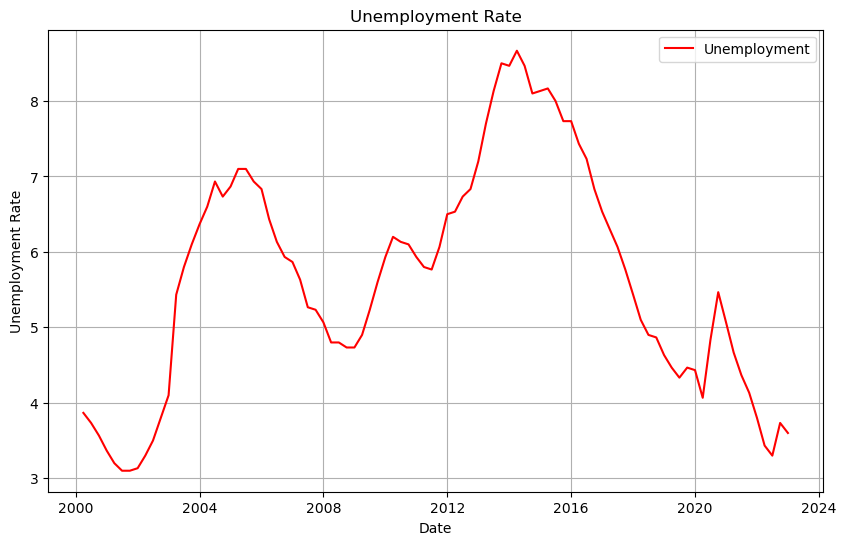

In [20]:
# Plot Unemployment data
plt.figure(figsize=(10, 6))
plt.plot(gdp_data['Unemployment'], color='red', label='Unemployment')
plt.title('Unemployment Rate')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.legend()
plt.grid(True)
plt.show()

In [44]:
def detect_upturn_periods(df, variable_col, window_size=12, z_threshold=2):
    """
    Detects potential upturn periods in a DataFrame using rolling statistical measures.

    This function calculates the Z-score of the specified economic variable using rolling mean
    and rolling standard deviation. It then identifies periods where the Z-score rises above a
    specified threshold, which can indicate potential upturns.

    Args:
        df (DataFrame): The input DataFrame containing the economic data.
        variable_col (str): The column name containing the economic variable to analyze.
        window_size (int, optional): The size of the rolling window for calculating mean and std. Default is 12.
        z_threshold (float, optional): The threshold for Z-score above which upturn periods are identified. Default is 2.

    Returns:
        upturn_periods (Index): A Pandas Index containing the indices of potential upturn periods.
    """
    # Calculate rolling mean and rolling standard deviation
    df['RollingMean'] = df[variable_col].rolling(window=window_size).mean()
    df['RollingStd'] = df[variable_col].rolling(window=window_size).std()
    
    # Calculate Z-score
    df['ZScore'] = (df[variable_col] - df['RollingMean']) / df['RollingStd']
    
    # Identify upturn periods
    upturn_periods = df[df['ZScore'] > z_threshold].index
    
    return upturn_periods


In [51]:
downturn_periods_unemployment = detect_upturn_periods(gdp_data, variable_col='Unemployment', window_size=12, z_threshold=2)
print("Downturn Periods Unemployment:")
print(downturn_periods_unemployment)

Downturn Periods Unemployment:
DatetimeIndex(['2003-03-31', '2003-06-30', '2010-03-31', '2013-03-31',
               '2013-06-30'],
              dtype='datetime64[ns]', name='Date', freq=None)


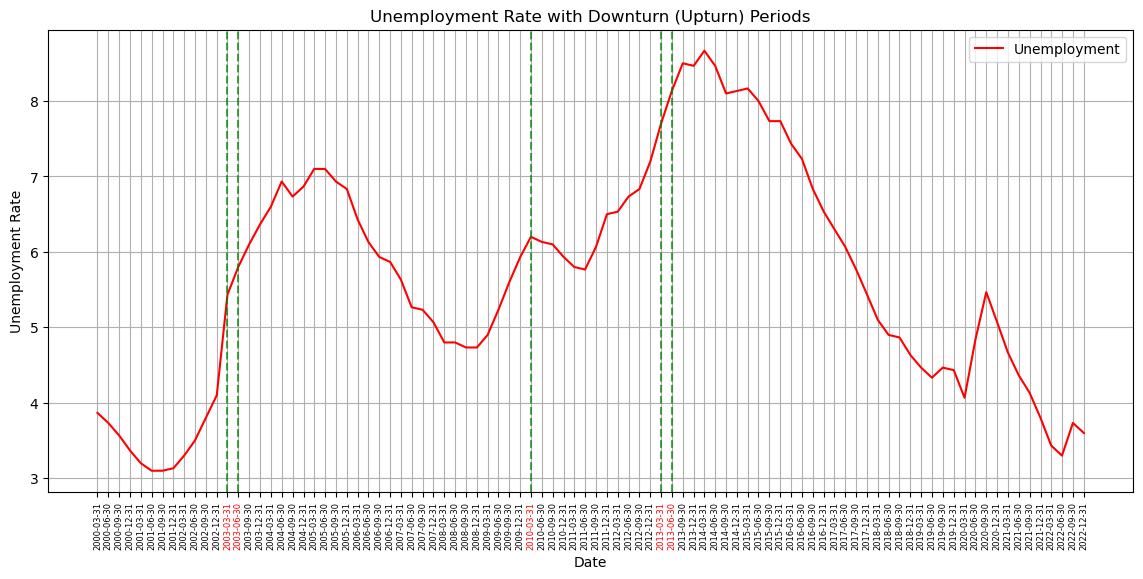

In [56]:
# Plot Unemployment data
plt.figure(figsize=(14, 6))
plt.plot(gdp_data['Unemployment'], color='red', label='Unemployment')
plt.title('Unemployment Rate with Downturn (Upturn) Periods')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.legend()
plt.grid(True)

# Adding bars for recession quarters
for date in downturn_dates:
    plt.axvline(x=date, color='green', linestyle='--', alpha=0.7)

# Adding x-ticks for all dates
xticks = list(gdp_data.index)
plt.xticks(xticks, rotation=90, ha='center', fontsize=6)

# Identify recession quarters in the x-ticks and color them red
ax = plt.gca()
for tick in ax.get_xticklabels():
    if pd.to_datetime(tick.get_text()) in downturn_dates:
        tick.set_color('red')


plt.show()